In [1]:
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import scipy as sp
import scipy.sparse as sparse
from ECIPCI import *
from ECI import *

# 读取数据

In [2]:
import pickle
with open('links.txt', 'rb') as handle: 
     link= pickle.loads(handle.read())

In [3]:
link[0]

(132544, 10)

# 迭代法

In [4]:
m=max([a for a,b in link])
n=max([b for a,b in link])
start = time.perf_counter()
e,p =ECI_PCI(link,(m+1,n+1), iter_n=10)
print(time.perf_counter()-start)

making matrix...
computing eci & pci...
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
53.623520164052024


# 稀疏矩阵法

In [6]:
start = time.perf_counter()
M=sparse.csc_matrix(([1.0]*len(link), ([a for a,b in link], [b for a,b in link])),shape=(m+1,n+1))
print("Time: ",time.perf_counter()-start)

Time:  1.3237354180309922


In [7]:
eci2,pci2,eci3,pci3 = Get_eci_pci_sparse(M)

==Time 0.17==


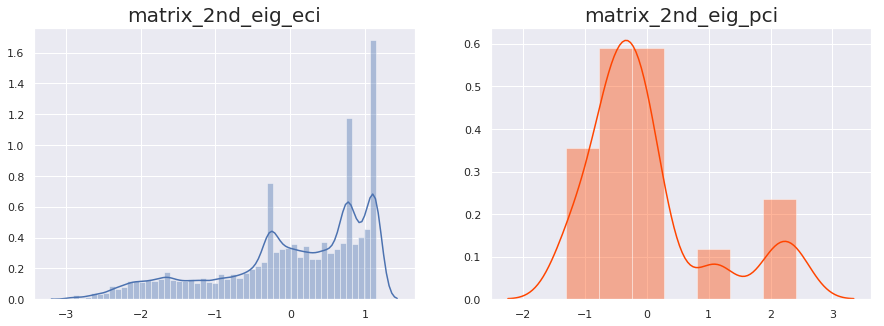

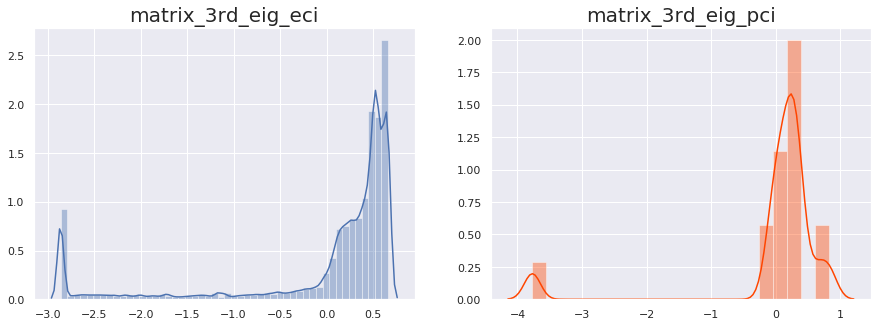

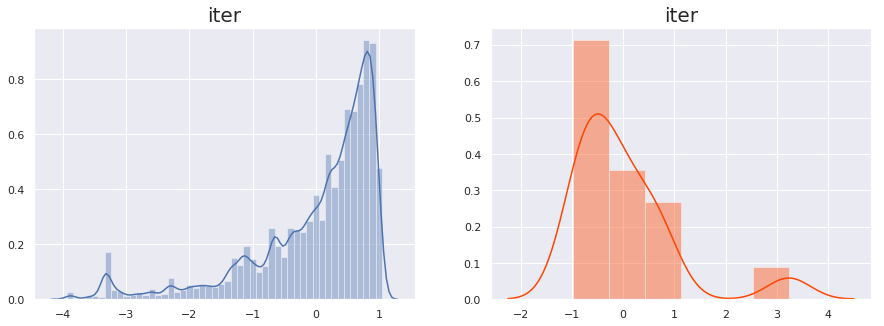

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(style="darkgrid")
eci,pci=  Get_z_score(eci2), Get_z_score(pci2)
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(eci)
plt.title("matrix_2nd_eig_eci",fontsize=20)
plt.subplot(122)
sns.distplot(pci,color='orangered')
plt.title("matrix_2nd_eig_pci",fontsize=20)
plt.savefig('matrix_2nd_eig_pci.png')
eci,pci=  Get_z_score(eci3), Get_z_score(pci3)
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(eci)
plt.title("matrix_3rd_eig_eci",fontsize=20)
plt.subplot(122)
sns.distplot(pci,color='orangered')
plt.title("matrix_3rd_eig_pci",fontsize=20)
plt.savefig('matrix_3rd_eig_pci.png')
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(e)
plt.title("iter",fontsize=20)
plt.subplot(122)
sns.distplot(p,color='orangered')
plt.title("iter",fontsize=20)
plt.savefig('iter.png')

Text(32.125, 0.5, 'iter_pci')

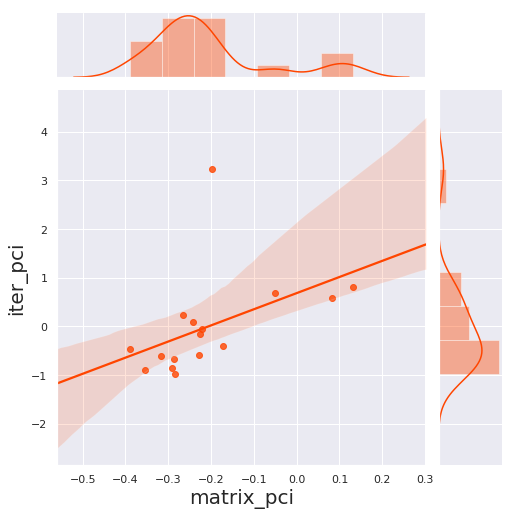

In [36]:
g = sns.jointplot( pci,p, kind="reg",color="orangered", height=7)
plt.xlabel("matrix_pci",fontsize=20)
plt.ylabel("iter_pci",fontsize=20)